# **Curso de Inteligencia Artificial**
---
<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://github.com/AntonioEscamilla/images-in-readMe/raw/master/Curso%20IA/upb%20logo.jpg", align="left", width="350">
</div>

### **Facultad en Tecnologías de la Información y la Comunicación**

### Escuela de Ingenierías

### Universidad Pontificia Bolivariana

---

## **Docente: Ph.D. Antonio Escamilla**

In [ ]:
import numpy as np

from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Activation, MaxPooling2D
import matplotlib.pyplot as plt

# Uso de GPU para entrenamiento

Hasta ahora hemos empleado (probablemente) un entorno de *hardware* sin GPU. Para realizar este ejercicio, debemos ejecutar el cuaderno en el entorno de **Google Colaboratory**(https://colab.research.google.com/), donde podremos comparar el entrenamiento de redes neuronales con y sin uso de GPU.

Para realizar esta parte, es necesario seguir los siguientes pasos:

- Acceder al entorno Google Colab (https://colab.research.google.com/). Puedes subir ficheros Ipython Notebook o almacenarnos en la cuenta de Google Drive asociada al usuario.

- Cargar el notebook de esta actividad.

- Ejecutar el código empleando aceleración por *hardware* basada en GPU.

**Nota**: Para controlar si se está utilizando *hardware* de aceleración (tipo GPU) se emplea el siguiente código:

In [ ]:
import tensorflow as tf

print("TF version   : ", tf.__version__)
print("GPU available: ", tf.config.list_physical_devices('GPU'))

TF version   :  2.15.0
GPU available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Arquitecturas Convolucionales Clásicas

En esta [publicación](https://www.jeremyjordan.me/convnet-architectures/), se presentan y se discute sobre las arquitecturas comúnmente utilizadas para redes convolucionales. Como se verá, casi todas las arquitecturas de CNN siguen los mismos principios generales de diseño, aplicando sucesivamente capas convolucionales a la entrada, y reduciendo periódicamente las dimensiones espaciales mientras se incrementa el número de mapas de características.

# 1. CIFAR-10 DataSet

**Descripción**:

CIFAR-10 consiste en un conjunto de **imágenes RGB **(rojo, verde, azul) de 32x32 píxeles cada una. En total, hay 60,000 imágenes etiquetadas, divididas en 10 clases distintas con 6,000 imágenes por clase. Esto lo convierte en un dataset de tamaño moderado pero lo suficientemente grande como para entrenar modelos de aprendizaje profundo de manera efectiva.

Cada imagen está representada como un tensor tridimensional, con dimensiones 32x32x3, donde 3 corresponde a los tres canales de color (rojo, verde, azul). Las imágenes están etiquetadas con un número entero que representa la clase a la que pertenecen, desde 0 hasta 9, según la lista de clases:

1. Avión
2. Automóvil
3. Pájaro
4. Gato
5. Ciervo
6. Perro
7. Rana
8. Caballo
9. Barco
10. Camión

Los datos de CIFAR-10 están preprocesados y normalizados, lo que significa que los valores de los píxeles están escalados entre 0 y 1. Esto es útil para el entrenamiento de modelos de aprendizaje automático, ya que facilita la convergencia y mejora la estabilidad del entrenamiento.

Debido a su tamaño relativamente pequeño y su diversidad de clases, CIFAR-10 se utiliza comúnmente como un punto de referencia estándar para probar algoritmos de clasificación de imágenes y desarrollar y comparar arquitecturas de redes neuronales convolucionales (CNNs). Además, su naturaleza diversa y su dificultad moderada lo hacen ideal para la investigación y la experimentación en el campo de la visión por computadora.

![](https://github.com/AntonioEscamilla/images-in-readMe/raw/master/Curso%20IA/cifar-10.png)

In [ ]:
from keras.datasets import cifar10

# Descarga el conjunto de datos y hace la partición entrenamiento/test
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Dimensiones de los conjuntos de datos
print('x_train shape {}'.format(x_train.shape))
print('x_test  shape {}'.format(x_test.shape))
print('y_train shape {}'.format(y_train.shape))
print('y_test  shape {}'.format(y_test.shape))

x_train shape (50000, 32, 32, 3)
x_test  shape (10000, 32, 32, 3)
y_train shape (50000, 1)
y_test  shape (10000, 1)


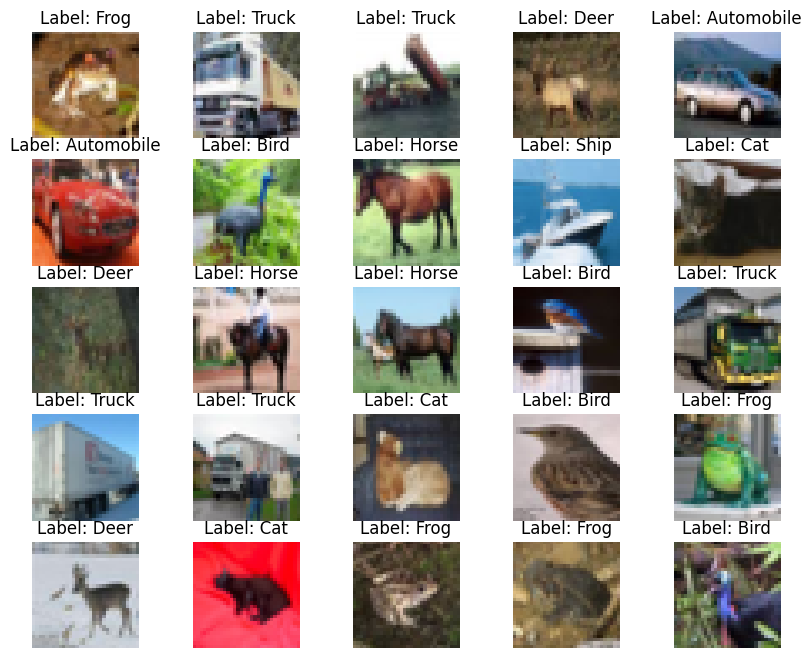

In [ ]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Visualizar algunas de las imágenes
# SU CODIGO AQUI

In [ ]:
# Normaliza los valores de píxeles de las imágenes dividiéndolos por 255.
# SU CODIGO AQUI

# Convierte las etiquetas de clase en vectores one-hot utilizando la función "to_categorical".
# SU CODIGO AQUI

# 2. Modelo Convolucional Profundo

Intentemos entrenar un modelo básico de aprendizaje profundo. Cualquier modelo de aprendizaje profundo que necesite clasificar imágenes utiliza la red neuronal convolucional (CNN). Las CNN han demostrado ser muy efectivas en datos de imágenes; además, si tenemos suficientes datos, podemos crear una red neuronal profunda con múltiples capas de CNN dispuestas en un diseño específico para crear resultados de última generación.

Comenzaremos con 2 capas CNN básicas, donde cada capa está adjunta a una capa maxpool. La agrupación máxima es una excelente manera de reducir el tamaño de los parámetros sin perder mucha información. Como es habitual en cualquier modelo de aprendizaje profundo, necesitamos aplanar los resultados de las capas intermedias y pasarlos a una red densa. Luego, el resultado de la red densa pasará a una capa de salida final donde el número de unidades representa el número de categorías en los datos, que en nuestro caso es 10. Se elige Softmax como activación final porque necesitamos la clase probable más alta de 10.

![](https://github.com/AntonioEscamilla/images-in-readMe/raw/master/Curso%20IA/base_cnn_for_cifar_10.png)

In [ ]:
def CNN_base():
    model=Sequential()
    model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(32, (5,5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

In [ ]:
model_1 = CNN_base()
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_1.summary()

In [ ]:
history_1 = model_1.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

In [ ]:
scores = model_1.evaluate(x_test, y_test, verbose=0)
print("Precisión obtenida sobre conjunto test: %1.4f" %scores[1])

In [ ]:
fig = plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(122)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Reto: Analice el resumen de la red neuronal convolucional para entender la propuesta de profundidad y reducción de dimensionalidad progresiva. Haga un analisis similar para entender la propuesta de la etapa Fully Connected.

Responda:
* **¿Cuál es la cantidad total de parámetros entrenables en la red neuronal convolucional (CNN)?**
* **¿Cómo se comparan estos parámetros con el tamaño del conjunto de datos CIFAR-10?**

Reto: Analice el resultado del entrenamiento por medio de las gráficas de loss y accuracy para los conjuntos de entrenamiento y validación.

Responda:

* **¿Qué evidencia de sobreajuste se observa en las gráficas de pérdida y precisión para los conjuntos de entrenamiento y validación?**
* **¿En qué punto de las curvas se puede identificar el sobreajuste y cómo se manifiesta en términos de divergencia entre las métricas de entrenamiento y validación?**

# 3. Optimización del Modelo Base

## 3.1 Dropout

Usando nuestro modelo base, podemos obtener una precisión de entrenamiento del 90% y una precisión de prueba del 65%, lo cual no es tan bueno, pero aún así estamos utilizando un modelo muy simple. Podemos realizar muchos ajustes para lograr una precisión bastante buena. Si observas el registro de entrenamiento del modelo anterior, puedes ver que la pérdida de validación está aumentando mucho, lo que significa que nuestro modelo está sobreajustando.

El sobreajuste significa que nuestro modelo se desempeña bien en el conjunto de datos de entrenamiento pero falla en generalizar en los datos no vistos. Intentemos reducir el sobreajuste.

¿Cómo reducir el sobreajuste? Si buscas en Google cómo reducir el sobreajuste, probablemente obtendrás respuestas como las siguientes:

- Agregar más datos
- Reducir la complejidad del modelo
- Aplicar regularización

La opción 1 y 2 no son adecuadas en nuestro caso, ya que obtener más datos es muy difícil y nuestro modelo no es tan complejo como para reducir la arquitectura. Entonces, regularicemos el modelo. En el aprendizaje profundo, la eliminación aleatoria (dropout) es una muy buena forma de regularización.

Dropout literalmente significa que vamos a eliminar algunas de las unidades neuronales al azar de nuestra red, lo que obliga a la próxima capa a aprender los patrones nuevamente. De esta manera, nuestro modelo se volverá más robusto y generalizará bien. Intentemos agregar dropout después de cada capa de MaxPool.


## 3.2 Batch Normalization

La normalización por lotes funciona de la misma manera que normalizamos los datos de entrada donde dividimos x_train/255. Lo que estamos tratando de hacer allí es organizar todas las características en la misma escala para que el modelo converja fácilmente y podamos reducir las distrosiones. Nuestra capa de entrada tiene la suerte de tener todo en la misma escala, ¿por qué no el resto de las capas?

Esto es exactamente lo que hacemos en la normalización por lotes, cada vez que pasamos la CNN a través de una capa de normalización por lotes, estamos normalizando las salidas de las capa anterior (activaciones) para que nuestro modelo sea estable y podamos entrenar el modelo por más tiempo y también utilizar una mayor tasa de aprendizaje.

Además, el tipo de normalización que utilizamos es la normalización por lotes, lo que significa que calculamos la media y la varianza para cada mini lote, no todos los datos.

**Reto:** Usar capas de Dropout y Batch Normalization para mejorar el desempeño del modelo anterior. Se propone usar Batch Normalization despues de cada capa de convolución y una capa de Dropout despues de cada capa de activación ReLU. En la etapa Fully Connected, usar una capa de Batch Normalization despues de la capa Dense, seguida de una capa de activación y luego el Dropout.

* **(Etapa convolucional):** Conv → BatchNorm → ReLU → Dropout → MaxPool
* **(Etapa fully-connected):** Dense → BatchNorm → ReLU → Dropout

In [ ]:
from keras.layers import BatchNormalization, Dropout

def Deeper_CNN():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    # SU CODIGO AQUI
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    # SU CODIGO AQUI
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    # SU CODIGO AQUI
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    # SU CODIGO AQUI
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    # SU CODIGO AQUI
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    # SU CODIGO AQUI
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    # SU CODIGO AQUI
    model.add(Dense(10, activation='softmax'))
    return model

In [ ]:
model_2 = Deeper_CNN()
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2.summary()

In [ ]:
history_2 = model_2.fit(x_train, y_train, epochs=20, validation_data=(x_test,y_test))

## Evaluación del Modelo

In [ ]:
# Precisión obtenida sobre conjunto test
# SU CODIGO AQUI

In [ ]:
# Grafique MODEL_ACCURACY y MODEL_LOSS en conjuntos de train y test
# SU CODIGO AQUI

In [ ]:
# Visualiza la matriz de confusión en forma de gráfica
# SU CODIGO AQUI

### Analice las gráficas anteriores y responda:

* **¿Qué efecto tienen las técnicas de dropout y batch normalization en la mitigación del sobreajuste, según se observa en las gráficas de pérdida y precisión para los conjuntos de entrenamiento y validación?**
* **¿Cómo se comparan las curvas de entrenamiento y validación después de implementar estas técnicas en términos de convergencia y alineación?**
* **¿Cómo se refleja la estabilidad del entrenamiento y la capacidad del modelo para generalizar en las gráficas de pérdida y precisión después de aplicar dropout y batch normalization?**

1/1 [==============================] - 0s 29ms/step


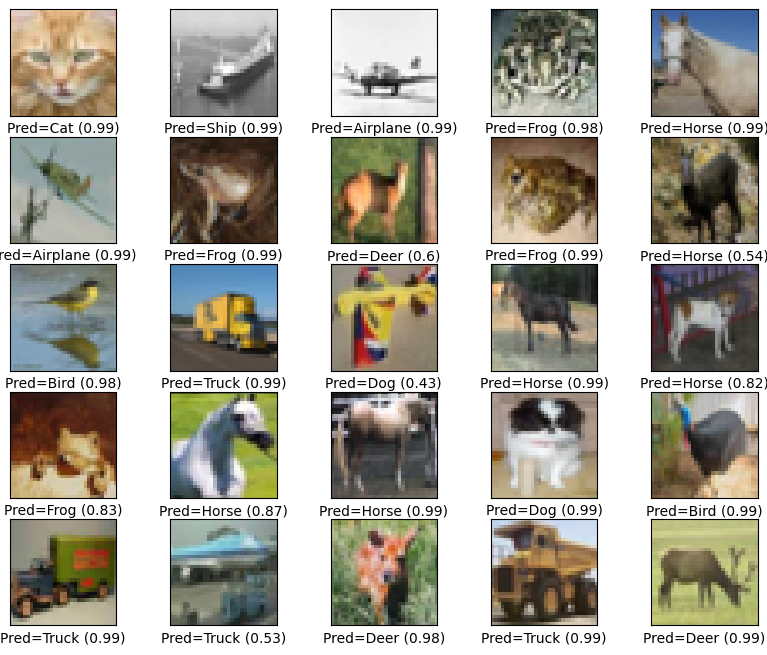

In [ ]:
import math

# Indices de 25 imagenes aleatorias del test set
# SU CODIGO AQUI
# Predicción de 25 imágenes aleatorias del test set
# SU CODIGO AQUI

# Utilizamos np.argmax para obtener el índice de la categoría con el valor más alto
# SU CODIGO AQUI
# Utilizamos np.max para obtener la probabilidad más alta
# SU CODIGO AQUI

# Graficar en un subplot las 25 imagenes. Use la etiqueta predicha y la probabilidad como titulo
# SU CODIGO AQUI